In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Features shape: (442, 10)
Target shape: (442,)
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -5.023634e-19  1.205672e-17 -2.250588e-16 -4.822688e-17 -1.431736e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   3.943552e-17 -6.028360e-18 -8.540177e-18  9.318840e-17  1.155436e-17  
std    

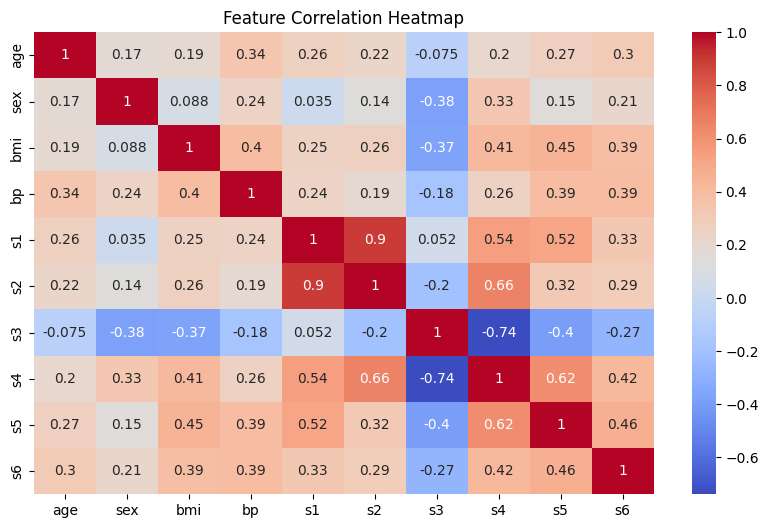

Linear Regression RMSE: 53.85
Linear Regression R2 Score: 0.45
Random Forest RMSE: 53.83
Random Forest R2 Score: 0.45


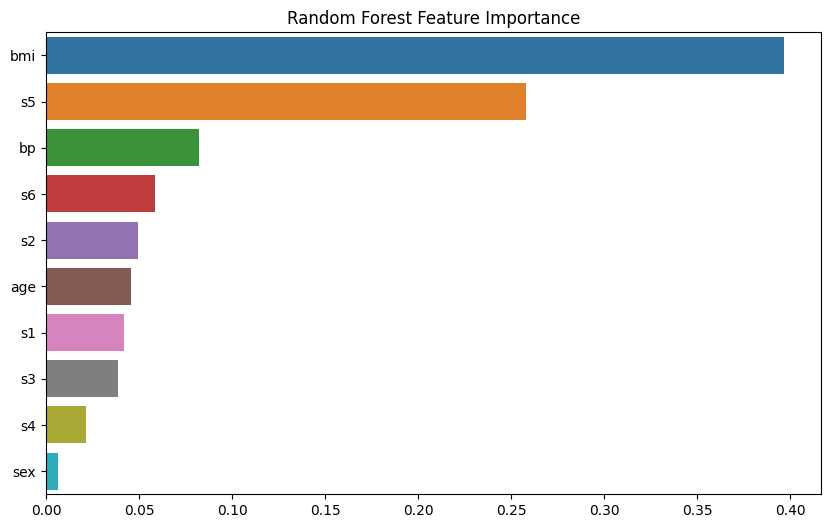

Random Forest 5-Fold CV R2 Scores: [0.39975    0.52660427 0.43925982 0.3521897  0.45020235]
Average R2: 0.43


In [1]:
# Diabetes Progression Prediction
# Dataset: Diabetes Dataset
# Goal: Predict disease progression using patient health measurements
# Techniques: Linear Regression, Random Forest Regressor

# ---------------------------
# 1️⃣ Import Libraries
# ---------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ---------------------------
# 2️⃣ Load Dataset
# ---------------------------
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

# Convert to DataFrame
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='target')

print("Features shape:", X.shape)
print("Target shape:", y.shape)
X.head()

# ---------------------------
# 3️⃣ Exploratory Data Analysis (EDA)
# ---------------------------
print(X.describe())
print(y.describe())

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# ---------------------------
# 4️⃣ Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------
# 5️⃣ Feature Scaling
# ---------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------
# 6️⃣ Linear Regression Model
# ---------------------------
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"Linear Regression R2 Score: {r2_lr:.2f}")

# ---------------------------
# 7️⃣ Random Forest Regressor
# ---------------------------
rf_model = RandomForestRegressor(
    n_estimators=200, max_depth=6, random_state=42
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R2 Score: {r2_rf:.2f}")

# ---------------------------
# 8️⃣ Feature Importance (Random Forest)
# ---------------------------
importances = rf_model.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance.values, y=feat_importance.index)
plt.title('Random Forest Feature Importance')
plt.show()

# ---------------------------
# 9️⃣ Optional: Cross-Validation
# ---------------------------
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(f"Random Forest 5-Fold CV R2 Scores: {cv_scores}")
print(f"Average R2: {cv_scores.mean():.2f}")
